# Exercise 1.1.2
### Classification of MNIST digits with a convolutional neural network

In this exercise we will classify MNIST digits again, but this time we will use a convolutional neural network (CNN).

First we import the modules we need

In [40]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import utils

We check that this script has a GPU available

In [46]:
if torch.cuda.is_available():
    print("The code will run on GPU. This is important so things run faster.")
else:
    print("The code will run on CPU. You should probably not do this.")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')   

The code will run on GPU. This is important so things run faster.


We import the MNIST dataset, which is built into pytorch

tensor([8, 5, 0, 5, 7, 4, 6, 2, 9, 3, 5, 3, 8, 0, 5, 5, 3, 2, 3, 9, 1, 7, 1, 1,
        1, 7, 9, 7, 3, 9, 7, 8, 1, 8, 0, 2, 7, 3, 9, 4, 9, 0, 0, 9, 9, 6, 0, 1,
        8, 8, 2, 4, 6, 2, 0, 4, 3, 7, 7, 7, 1, 0, 7, 0])


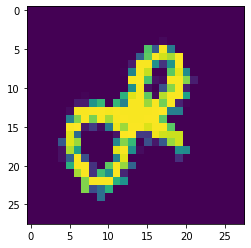

tensor([3, 5, 4, 1, 5, 7, 4, 1, 7, 2, 8, 4, 0, 1, 2, 5, 2, 3, 7, 6, 1, 6, 5, 5,
        1, 9, 1, 3, 6, 0, 6, 2, 3, 0, 8, 1, 9, 3, 8, 6, 9, 0, 9, 3, 2, 6, 6, 3,
        9, 2, 1, 2, 7, 4, 2, 2, 9, 9, 8, 3, 5, 4, 4, 8])


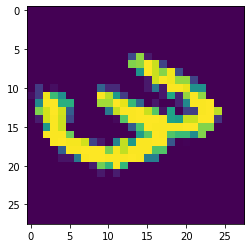

tensor([5, 7, 4, 3, 2, 9, 4, 2, 6, 1, 8, 7, 3, 2, 5, 7, 1, 7, 3, 0, 2, 8, 1, 0,
        9, 4, 8, 0, 4, 0, 0, 3, 8, 7, 6, 8, 8, 7, 3, 4, 8, 3, 5, 2, 4, 2, 6, 3,
        8, 9, 2, 7, 2, 6, 7, 2, 8, 8, 5, 0, 5, 9, 4, 7])


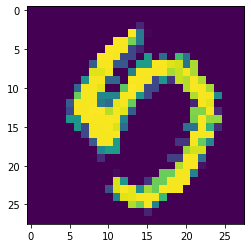

tensor([1, 2, 5, 5, 3, 2, 3, 4, 6, 7, 5, 4, 0, 7, 9, 3, 5, 8, 1, 6, 9, 8, 0, 0,
        3, 9, 7, 6, 2, 2, 3, 1, 4, 8, 5, 2, 0, 4, 8, 5, 5, 4, 9, 0, 9, 0, 4, 2,
        3, 8, 1, 1, 8, 8, 5, 6, 1, 5, 8, 1, 4, 7, 3, 8])


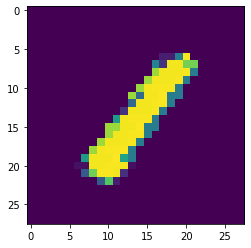

tensor([3, 8, 0, 6, 0, 8, 2, 3, 1, 8, 8, 9, 0, 0, 7, 2, 8, 5, 9, 0, 7, 5, 2, 4,
        7, 0, 3, 3, 1, 4, 6, 7, 7, 8, 0, 9, 0, 8, 7, 8, 4, 7, 8, 4, 5, 0, 1, 5,
        8, 0, 3, 8, 4, 1, 7, 7, 6, 5, 7, 1, 6, 7, 8, 5])


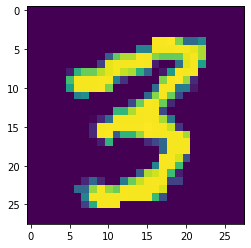

tensor([6, 1, 0, 1, 0, 4, 3, 6, 0, 8, 3, 4, 8, 1, 3, 6, 2, 1, 7, 4, 4, 4, 4, 8,
        2, 1, 2, 9, 3, 7, 6, 7, 2, 8, 5, 3, 5, 9, 8, 5, 3, 8, 8, 9, 3, 6, 0, 1,
        8, 0, 9, 7, 9, 0, 6, 5, 2, 9, 7, 8, 5, 3, 9, 9])


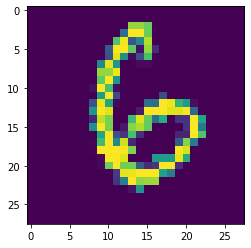

tensor([5, 5, 9, 4, 5, 7, 5, 0, 2, 9, 7, 9, 9, 3, 3, 4, 9, 3, 3, 7, 4, 6, 1, 1,
        5, 4, 3, 3, 5, 4, 4, 2, 5, 9, 7, 5, 9, 6, 3, 5, 6, 8, 4, 1, 6, 9, 8, 1,
        6, 1, 9, 2, 5, 5, 4, 7, 9, 0, 7, 1, 9, 0, 4, 8])


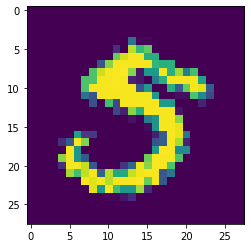

tensor([0, 5, 4, 0, 6, 1, 6, 7, 0, 4, 4, 1, 9, 8, 8, 6, 2, 1, 5, 2, 0, 7, 3, 6,
        8, 2, 1, 0, 5, 4, 1, 1, 4, 9, 0, 4, 5, 8, 7, 9, 1, 5, 4, 6, 0, 6, 7, 4,
        9, 3, 3, 0, 7, 6, 1, 6, 1, 2, 6, 1, 4, 5, 7, 6])


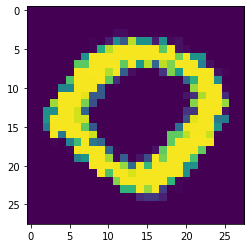

tensor([7, 6, 0, 3, 0, 5, 2, 4, 1, 7, 0, 4, 8, 1, 6, 8, 7, 5, 2, 4, 3, 1, 4, 4,
        1, 5, 5, 1, 4, 4, 9, 3, 0, 8, 0, 9, 4, 5, 6, 3, 5, 4, 6, 1, 8, 6, 5, 6,
        5, 0, 1, 5, 5, 7, 6, 4, 9, 4, 1, 4, 9, 5, 9, 5])


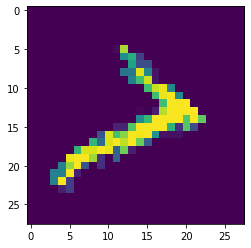

In [48]:
batch_size = 64
# do data augmentation
transform_train=transforms.Compose([
    transforms.RandomRotation(30),
    transforms.ToTensor(),
])
trainset = datasets.MNIST('./data', train=True, download=True, transform=transform_train)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1)

## show augmented images
cnt = 0
to_pil_image = transforms.ToPILImage()
for image,label in train_loader:
    cnt+=1
    if cnt//10 == 0:
        print(label)
        img = to_pil_image(image[0])
        #img.show()
        plt.imshow(img)
        plt.show()
        
testset = datasets.MNIST('./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=1)

You should implement a network to classify MNIST digits. 
The network should consist of two parts, a part with convolutions and one with fully connected layers.
The convolutional part we will call `convolutional`, and it should contain the follwing:
* two convolutional layers with 8 features
* a $2\times2$ max pooling layer
* two convolutional layers with 16 features
* a fully connected layer

The convolutions should be $3\times 3$, and should not change the size of the output. What does this mean that the stride and padding should be?

Do for example check the documentation of the `nn` module https://pytorch.org/docs/stable/nn.html

In [23]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.convolutional = nn.Sequential(
                # input is 28 x 28, output features is 8
                nn.Conv2d(1,8,3,stride=1,padding=(1,1)),
                nn.ReLU(),
                nn.Conv2d(8,8,3,stride=1,padding=(1,1)),
                nn.ReLU(),
                # after maxpooling is 14 x 14
                nn.MaxPool2d(2,stride=2),
                # now 2 layers with 16 features
                nn.Conv2d(8,16,3,stride=1,padding=(1,1)),
                nn.ReLU(),
                nn.Conv2d(16,16,3,stride=1,padding=(1,1)),
                nn.ReLU()
            )

        self.fully_connected = nn.Sequential(
                nn.Linear(14*14*16, 500),
                nn.ReLU(),
                nn.Linear(500, 10),
                nn.Softmax(dim=1))
    
    def forward(self, x):
        x = self.convolutional(x)
        #reshape x so it becomes flat, except for the first dimension (which is the minibatch)
        x = x.view(x.size(0), -1)
        x = self.fully_connected(x)
        return x

We instantiate a copy of our network and transfer it to the GPU if it's available.

In [24]:
model = Network()
print(model)
model.to(device)
#Initialize the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Network(
  (convolutional): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
  )
  (fully_connected): Sequential(
    (0): Linear(in_features=3136, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=10, bias=True)
    (3): Softmax()
  )
)


We train this network for five epochs

In [25]:
num_epochs = 10

for epoch in tqdm(range(num_epochs), unit='epoch'):
    #For each epoch
    train_correct = 0
    for minibatch_no, (data, target) in tqdm(enumerate(train_loader), total=len(train_loader)):
        data, target = data.to(device), target.to(device)
        #Zero the gradients computed for each weight
        optimizer.zero_grad()
        #Forward pass your image through the network
        output = model(data)
        #Compute the loss
        loss = F.nll_loss(torch.log(output), target)
        #Backward pass through the network
        loss.backward()
        #Update the weights
        optimizer.step()
        
        #Compute how many were correctly classified
        predicted = output.argmax(1)
        train_correct += (target==predicted).sum().cpu().item()
    #Comput the test accuracy
    test_correct = 0
    for data, target in test_loader:
        data = data.to(device)
        with torch.no_grad():
            output = model(data)
        predicted = output.argmax(1).cpu()
        test_correct += (target==predicted).sum().item()
    train_acc = train_correct/len(trainset)
    test_acc = test_correct/len(testset)
    print("Accuracy train: {train:.1f}%\t test: {test:.1f}%".format(test=100*test_acc, train=100*train_acc))

Accuracy train: 82.3%	 test: 97.7%


Accuracy train: 96.9%	 test: 98.2%


Accuracy train: 97.6%	 test: 98.4%


Accuracy train: 98.1%	 test: 98.6%


Accuracy train: 98.4%	 test: 98.1%


Accuracy train: 98.5%	 test: 98.8%


Accuracy train: 98.7%	 test: 98.9%


Accuracy train: 98.8%	 test: 98.9%


Accuracy train: 98.9%	 test: 98.7%


Accuracy train: 99.0%	 test: 99.1%



Hopefully you now have a model that's able to achieve decent performance on MNIST.
It should have around 97.5% accuracy on the test set after the first epoch.

* Why does it have higher accuracy on the test set than the training set after the first epoch?

### Data augmentation
 * Add random rotations to the MNIST digits during training (you have to go back and modify the dataloader)
 
  hint: you can use `transforms.RandomRotation` 
  
  hint: you can combine multiple transforms into one with `transforms.Compose`

How does this affect your training and testing loss?

 * Try plotting some of the augmented images, to visually confirm what your augmentation is doing.

 * Try adding another type of data augmentation.

### Explore the model
What has the model learned? You can access all the weights in the model with `model.parameters()`. Here we just print the shape.
 - Try showing images of the filters in the first layer. 
 - Can you from the sizes alone identify which layer it is in our model?

In [69]:
#[w.shape for w in model.parameters()]
# model.squeeze()
# to_pil_image = transforms.ToPILImage()
# for w in model.parameters():
#     print(w.size(0))
#     fig, axarr = plt.subplots(w.size(0))
#     for idx in range(w.size(0)):
#         print(w[idx])
#         #axarr[idx].imshow(w[idx].squeeze())
# #     for j in range(0,w.shape[0]):
# #         #print(j)
# #         img=to_pil_image(w[j,0,:,:])
# #         plt.imshow(img)
# #         plt.show()
        
#     # only first layer
#     break

AttributeError: 'Network' object has no attribute 'squeeze'

### Dropout
 * Try adding dropout to your model.
 
You can add it between the convolutional layers and or in the fully connected part.

Remember to call `net.train()` and `net.eval()` to change the model from test to training state, so it know's when you want it to apply dropout.